In [1]:
import matplotlib.pyplot as plt
import numpy as np

def drawline(p0, p1):
    plt.plot([p0[0], p1[0]], [p0[1], p1[1]], 'k-')

def drawPolygon(vertices):
    vertices.append(vertices[0]) 
    xs, ys = zip(*vertices) 
    plt.fill(xs, ys, edgecolor='r', fill=False)

def dot(p0, p1):
    return p0[0] * p1[0] + p0[1] * p1[1]

def max(t):
    return np.max(t)

def min(t):
    return np.min(t)

# Cyrus Beck function
def CyrusBeck(vertices, line):
    n = len(vertices)
    P1_P0 = (line[1][0] - line[0][0], line[1][1] - line[0][1])
    normal = [(vertices[i][1] - vertices[(i + 1) % n][1], vertices[(i + 1) % n][0] - vertices[i][0]) for i in range(n)]
    P0_PEi = [(vertices[i][0] - line[0][0], vertices[i][1] - line[0][1]) for i in range(n)]
    numerator = [dot(normal[i], P0_PEi[i]) for i in range(n)]
    denominator = [dot(normal[i], P1_P0) for i in range(n)]
    t = [numerator[i] / denominator[i] if denominator[i] != 0 else 0 for i in range(n)]
    tE = [t[i] for i in range(n) if denominator[i] > 0]
    tL = [t[i] for i in range(n) if denominator[i] < 0]
    tE.append(0)
    tL.append(1)
    print(f"Parametric Values entering the Polygon: {tE}")
    print(f"Parametric Values leaving the Polygon: {tL}")
    temp = [max(tE), min(tL)]
    if temp[0] > temp[1]:
        return None # Trivial reject
    
    # New Line Co ordinates
    newPair = [(line[0][0] + P1_P0[0] * temp[0], line[0][1] + P1_P0[1] * temp[0]), 
               (line[0][0] + P1_P0[0] * temp[1], line[0][1] + P1_P0[1] * temp[1])]
    print(f"New Coordinates: {newPair}")
    return newPair

def plotting(vertices , line):
    plt.figure(figsize=(6, 6))
    plt.title('Before Clipping')
    drawPolygon(vertices)
    drawline(line[0], line[1])  
    plt.xlim(0, 500)
    plt.ylim(0, 500)
    plt.show()

    newPair = CyrusBeck(vertices, line)
    if newPair is not None:
        plt.figure(figsize=(6, 6))
        plt.title('After Clipping')
        drawPolygon(vertices)
        drawline(newPair[0], newPair[1])  
        plt.xlim(0, 500)
        plt.ylim(0, 500)
        plt.show()

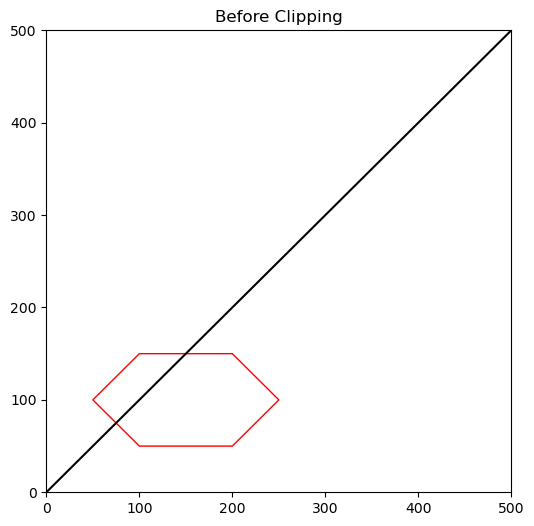

Parametric Values entering the Polygon: [0.15, 0.1, 0]
Parametric Values leaving the Polygon: [0.35, 0.3, 1]
New Coordinates: [(75.0, 75.0), (150.0, 150.0)]


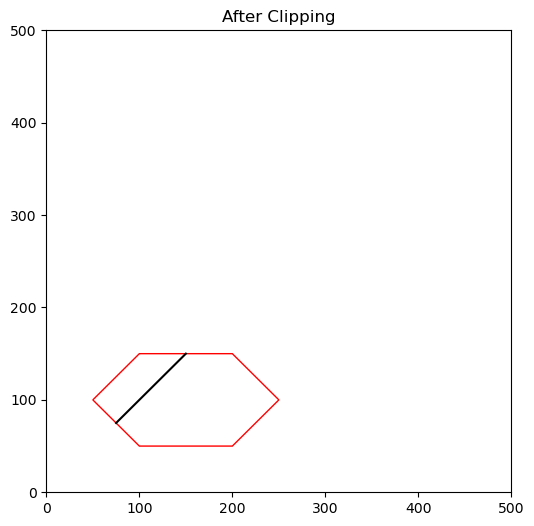

In [2]:
vertices = [(200, 50), (250, 100), (200, 150), (100, 150), (50, 100), (100, 50)]
line = [(0, 0), (500, 500)]  
plotting(vertices , line)